In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math, scipy, skimage, os
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 7
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['pdf.fonttype'] = 42

mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['xtick.major.size'] = 2.5
mpl.rcParams['ytick.major.size'] = 2.5


In [2]:
def confidence_interval(data, confidence=0.95):
    """
    Calculate the confidence interval for the mean of a NumPy array.

    Parameters:
        data (array-like): Input data (1D NumPy array or list).
        confidence (float): Confidence level (e.g., 0.95 for 95%).

    Returns:
        (float, float): Lower and upper bounds of the confidence interval.
    """
    data = np.array(data)
    n = len(data)
    if n < 2:
        raise ValueError("At least two data points are required")
    mean = np.mean(data)
    sem = scipy.stats.sem(data)  # standard error of the mean
    margin = sem * scipy.stats.t.ppf((1 + confidence) / 2.0, n - 1)
    return margin



### Data preparation

In [3]:
# load the total data summary
data_collection = pd.read_excel('B:\\home\\Xin home drive\\data_meroblastic\\majority_data_info.xlsx', sheet_name = 'lcii',
                                converters={'rep':int, 'cut_no':int, 'pre_cut_frame_num':int, 'post_cut_frame':int, 'no_analysis_method':str, 'rv_analysis_unit':str, 'rv_analysis_method':str, 'rv_analysis_date':str})
data_collection = data_collection.loc[data_collection['obj'] == '40x']

# data_collection = data_collection.loc[data_collection['cut_type'].isin(['wt', 'carhoa'])]
# data_collection = data_collection.loc[data_collection['where'].isin(['middle', 'edge', 'ac'])]
data_collection

,rep,experiment,cut_type,batch,cut_no,where,orientation,note,obj,pixel_size,...,rv_analysis_method,rv_analysis_date,rv_manual,rv_manual_angle1,rv_manual_angle2,Unnamed: 31,recoiling_analysis1,recoiling_analysis2,recoiling_analysis3,recoiling_analysis4
62,62,xin250328_lcii_wt,wt,2.0,1,middle,perp,NaN,40x,0.16157,...,automatic,250723_1351,NaN,NaN,NaN,NaN,8.0,4.255,18.0,13.464
63,63,xin250328_lcii_wt,wt,2.0,2,edge,perp,NaN,40x,0.16157,...,automatic,250723_1351,NaN,NaN,NaN,NaN,8.0,2.908,18.0,7.378
64,64,xin250328_lcii_wt,wt,2.0,3,middle,perp,NaN,40x,0.16157,...,automatic,250723_1351,NaN,NaN,NaN,NaN,9.0,4.686,19.0,18.742
65,65,xin250328_lcii_wt,wt,2.0,4,middle,perp,NaN,40x,0.16157,...,automatic,250723_1351,NaN,NaN,NaN,NaN,8.0,7.513,18.0,23.508
66,66,xin250328_lcii_wt,wt,2.0,5,edge,perp,phase2,40x,0.16157,...,automatic,250723_1351,NaN,NaN,NaN,NaN,8.0,2.585,18.0,6.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,1013,xin250710_lcii_wt,wt,2.0,59,ac,perp,NaN,40x,0.16157,...,manual,250724_1322,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014,1014,xin250710_lcii_wt,wt,2.0,60,ac,para,NaN,40x,0.16157,...,manual,250724_1322,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015,1015,xin250710_lcii_wt,wt,2.0,61,ac,perp,NaN,40x,0.16157,...,manual,250724_1322,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1016,1016,xin250710_lcii_wt,wt,2.0,62,NaN,NaN,cut the septum with little recoiling,40x,0.16157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
replicates_experiments = data_collection['experiment'].unique()
print(replicates_experiments)

['xin250328_lcii_wt' 'xin250401_lcii_wt' 'xin250402_lcii_wt'
 'xin250403_lcii_wt' 'xin250408_lcii_wt' 'xin250411_lcii_wt'
 'xin250417_lcii_carhoa' 'xin250418_lcii_carhoa' 'xin250424_lcii_carhoa'
 'xin250625_lcii_carhoa' 'xin250626_lcii_carhoa' 'xin250703_lcii_wt'
 'xin250704_lcii_carhoa' 'xin250701_lcii_carhoa' 'xin250627_lcii_carhoa'
 'xin250710_lcii_wt']


In [5]:
# load the no data
lcii_folder = "H:\\Xin home drive\\data_meroblastic\\Laser_cutter\\laser_cutter_ii\\"
for replicates_experiment in replicates_experiments:
    no_file_name = [s for s in os.listdir(lcii_folder + replicates_experiment) if "no_analysis" in s and ".xlsx" in s][0]
    # print(no_file_name)
    no_file = pd.read_excel(lcii_folder + replicates_experiment+ '\\'+no_file_name, index_col=0)
    data_collection.loc[no_file.index, ['no_qxx', 'no_qxy', 'no_analysis_method']] = no_file.loc[:, ['no_qxx', 'no_qxy', 'no_analysis_method']]

In [6]:
# rearrange the rv data
data_collection.loc[data_collection['rv_analysis_method'] == 'automatic', 'rv'] = data_collection.loc[data_collection['rv_analysis_method'] == 'automatic', 'rv_automatic']
data_collection.loc[data_collection['rv_analysis_method'] == 'manual', 'rv'] = data_collection.loc[data_collection['rv_analysis_method'] == 'manual', 'rv_manual']
data_collection['rv'] = data_collection['rv'] * data_collection['pixel_size'] / data_collection['time_interval']

In [7]:
# count the number of each experiment
combo_counts = data_collection.groupby(["cut_type", "where", "orientation"]).size().reset_index(name='count')
display(combo_counts)

,cut_type,where,orientation,count
0,carhoa,ac,para,96
1,carhoa,ac,perp,20
2,carhoa,edge,para,22
3,carhoa,edge,perp,27
4,carhoa,middle,para,74
5,carhoa,middle,perp,202
6,wt,ac,para,58
7,wt,ac,perp,49
8,wt,edge,para,34
9,wt,edge,perp,49


### 1. Nematic order change

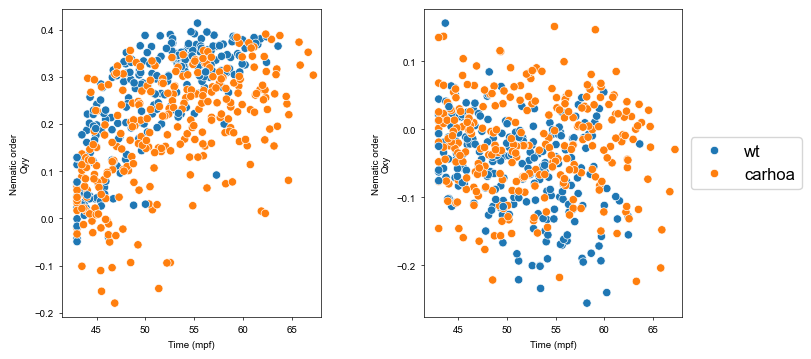

In [8]:
data_subset = data_collection.copy()
data_subset.loc[data_subset['orientation']=='para', 'no_qxx'] = -data_subset.loc[data_subset['orientation']=='para', 'no_qxx']

# plot
fig, axs = plt.subplots(1,2, figsize=[8, 4], gridspec_kw={'wspace':0.4})
sns.scatterplot(data = data_subset.loc[data_subset['where']=='middle'], x = 'mpf', y = 'no_qxx', ax=axs[0],
                hue = 'cut_type')
sns.scatterplot(data = data_subset.loc[data_subset['where']=='middle'], x = 'mpf', y = 'no_qxy', ax=axs[1],
                hue = 'cut_type')

axs[0].legend().set_visible(False)
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)

axs[0].set_ylabel('Nematic order\nQyy')
axs[1].set_ylabel('Nematic order\nQxy')
axs[0].set_xlabel('Time (mpf)')
axs[1].set_xlabel('Time (mpf)')

[ax.set_xlim(41.5, 68) for ax in axs]
[ax.set_xticks(np.arange(45, 68, 5)) for ax in axs]

plt.show()

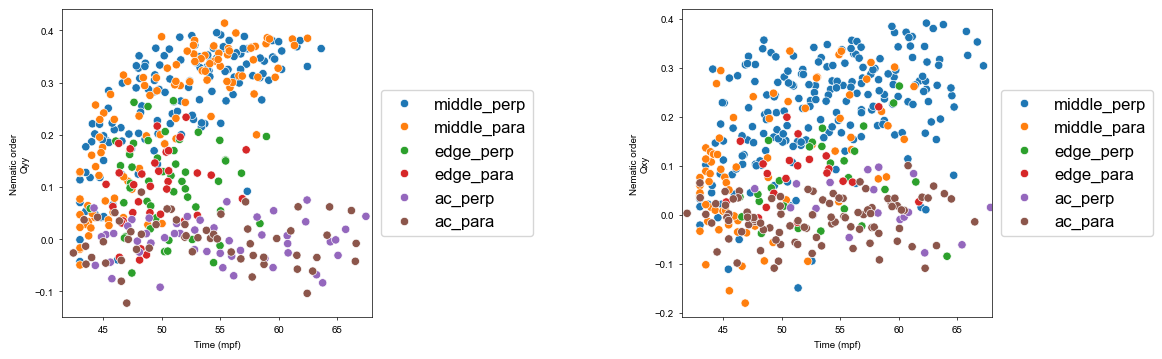

In [9]:
data_subset = data_collection.copy()
data_subset = data_subset.sort_values(['where', 'orientation'], ascending=False)
data_subset.loc[data_subset['orientation']=='para', 'no_qxx'] = -data_subset.loc[data_subset['orientation']=='para', 'no_qxx']
data_subset['sub_style'] = data_subset['where'] + '_' + data_subset['orientation']

# plot
fig, axs = plt.subplots(1,2, figsize=[12, 4], gridspec_kw={'wspace':1})
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'mpf', y = 'no_qxx', ax=axs[0],
                hue = 'sub_style')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'mpf', y = 'no_qxx', ax=axs[1],
                hue = 'sub_style')

axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)

axs[0].set_ylabel('Nematic order\nQyy')
axs[1].set_ylabel('Nematic order\nQxy')
axs[0].set_xlabel('Time (mpf)')
axs[1].set_xlabel('Time (mpf)')

[ax.set_xlim(41.5, 68) for ax in axs]
[ax.set_xticks(np.arange(45, 68, 5)) for ax in axs]

plt.show()

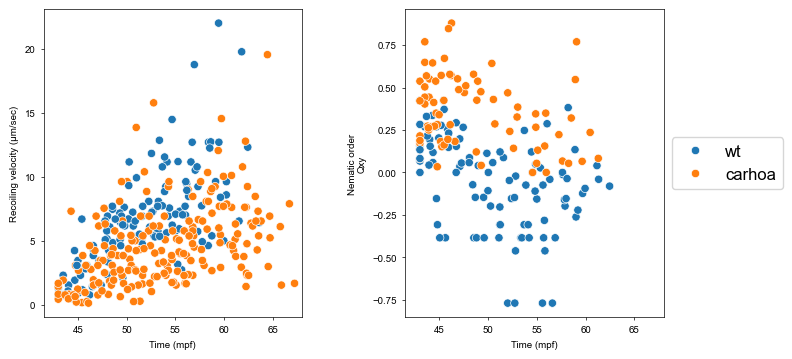

In [10]:
data_subset = data_collection.copy()
# data_subset = data_subset.loc[data_subset['cut_type']=='wt']
data_subset = data_subset.loc[data_subset['where']=='middle']
data_subset.loc[data_subset['orientation']=='para', 'no_qxx'] = -data_subset.loc[data_subset['orientation']=='para', 'no_qxx']

# plot
fig, axs = plt.subplots(1,2, figsize=[8, 4], gridspec_kw={'wspace':0.4})
sns.scatterplot(data = data_subset.loc[data_subset['orientation']=='perp'], x = 'mpf', y = 'rv', ax=axs[0],
                hue = 'cut_type')
sns.scatterplot(data = data_subset.loc[data_subset['orientation']=='para'], x = 'mpf', y = 'rv', ax=axs[1],
                hue = 'cut_type')

axs[0].legend().set_visible(False)
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)

axs[0].set_ylabel('Recoiling velocity (\u03BCm/sec)')
axs[1].set_ylabel('Nematic order\nQxy')
axs[0].set_xlabel('Time (mpf)')
axs[1].set_xlabel('Time (mpf)')

[ax.set_xlim(41.5, 68) for ax in axs]
[ax.set_xticks(np.arange(45, 68, 5)) for ax in axs]
plt.show()

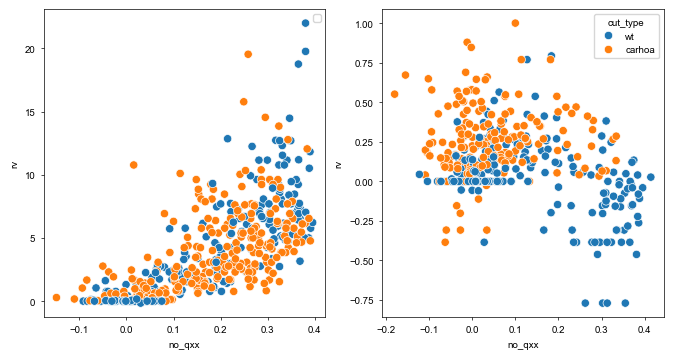

In [11]:
data_subset = data_collection.copy()
# data_subset = data_subset.loc[data_subset['orientation'] == 'perp']
data_subset.loc[data_subset['orientation']=='para', 'no_qxx'] = -data_subset.loc[data_subset['orientation']=='para', 'no_qxx']

fig, axs = plt.subplots(1,2, figsize=[8, 4])
sns.scatterplot(data = data_subset.loc[data_subset['orientation'] == 'perp'], x = 'no_qxx', y = 'rv', ax=axs[0],
                hue = 'cut_type')
sns.scatterplot(data = data_subset.loc[data_subset['orientation'] == 'para'], x = 'no_qxx', y = 'rv', ax=axs[1],
                hue = 'cut_type')
# sns.scatterplot(data = data_subset.loc[data_subset['where']=='middle'], x = 'mpf', y = 'no_qxy', ax=axs[1],
#                 hue = 'cut_type')
axs[0].legend("")
plt.show()

Compare the nematic order at the band middle

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
data_subset = data_collection.copy()


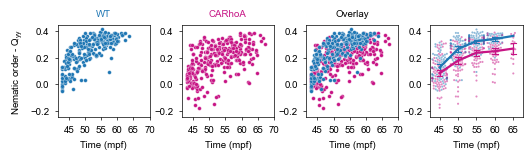

In [110]:
data_subset = data_collection.copy()
data_subset = data_subset.loc[data_subset['where']=='middle']
data_subset.loc[data_subset['orientation']=='para', 'no_qxx'] = -data_subset.loc[data_subset['orientation']=='para', 'no_qxx']
data_subset['time_bin'] = 5 * np.round(data_subset['mpf'] / 5).astype('int')
# data_subset = data_subset.dropna(subset=['where', 'orientation', 'no_qxx'])



# plot
fig, axs = plt.subplots(1,4,figsize=[6, 1.2], gridspec_kw={'wspace': 0.35})
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'mpf', y = 'no_qxx', ax=axs[0], legend=False,
                s=7.5, color = 'tab:blue')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'mpf', y = 'no_qxx', ax=axs[1], legend=False,
                s=7.5, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'mpf', y = 'no_qxx', ax=axs[2], legend=False,
                s=7.5, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'mpf', y = 'no_qxx', ax=axs[2], legend=False,
                s=7.5, color = 'tab:blue')

sns.swarmplot(data = data_subset, x = 'time_bin', y = 'no_qxx', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
              size=1.5, alpha=0.5, zorder=5)
sns.pointplot(data = data_subset, x = 'time_bin', y = 'no_qxx', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
              estimator='mean', errorbar=('ci', 95), lw=1.6, marker='_', markersize=0, markeredgewidth=1, zorder=6,
              capsize=0.3, err_kws={'linewidth': 0.8})

axs[0].set_ylabel('Nematic order - $\\mathregular{Q_{yy}}$')
axs[3].set_ylabel('Nematic order - $\\mathregular{Q_{yy}}$')

[ax.set_ylabel('') for ax in axs[1:]]

axs[0].set_title('WT', fontsize=7, color='tab:blue')
axs[1].set_title('CARhoA', fontsize=7, color='mediumvioletred')
axs[2].set_title('Overlay', fontsize=7)

[ax.set_xlabel('Time (mpf)') for ax in axs]
[ax.set_xlim(41.5, 70) for ax in axs[:3]]
[ax.set_xticks(np.arange(45, 71, 5)) for ax in axs[:3]]
[ax.set_ylim(-0.25, 0.45) for ax in axs[:4]]
[ax.set_yticks(np.arange(-0.2, 0.4, 0.2)) for ax in axs[:4]]

plt.savefig('wt_carhoa_qyy-middle-time.svg')
plt.show()

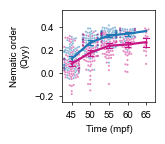

In [112]:
fig, ax = plt.subplots(figsize=[1.2, 1.2])
sns.swarmplot(data = data_subset, x = 'time_bin', y = 'no_qxx', ax=ax, hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
              size=1.5, alpha=0.5, zorder=5)
sns.pointplot(data = data_subset, x = 'time_bin', y = 'no_qxx', ax=ax, hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
              estimator='mean', errorbar=('ci', 95), lw=1.6, marker='_', markersize=0, markeredgewidth=1, zorder=6,
              capsize=0.3, err_kws={'linewidth': 0.8})
ax.set_ylim(-0.25, 0.55)
ax.set_yticks(np.arange(-0.2, 0.6, 0.2))
ax.set_ylabel('Nematic order\n(Qyy)')
ax.set_xlabel('Time (mpf)')
plt.savefig('wt_carhoa_qyy-middle-time_separate.svg')

plt.show()

In [72]:
data_subset_stats = data_subset[['cut_type', 'time_bin', 'no_qxx']]

p_vals = []
for time_bin in np.unique(data_subset_stats['time_bin']):
    print(time_bin)
    groups = data_subset_stats[data_subset_stats['time_bin'] == time_bin]
    group1 = groups[groups['cut_type']=='wt'].no_qxx
    group2 = groups[groups['cut_type']=='carhoa'].no_qxx

    testgroup1, testgroup2 = group1, group2
    print('--Shapiro-Wilk test for normality--')
    stat, p = scipy.stats.shapiro(testgroup1)
    print("Control: W=%.3f, p=%.3f" % (stat, p))
    stat, p = scipy.stats.shapiro(testgroup2)
    print("Control: W=%.3f, p=%.3f" % (stat, p))
    # Levene’s test (center='median' is more robust to non-normal data)
    stat, p_val = scipy.stats.levene(testgroup1, testgroup2, center='mean')
    print('--Levene’s test for variance equity--')
    print("Levene’s test statistic =", stat)
    print("p-value =", p_val)
    # Mann–Whitney U test (two-sided)
    u_stat, p_val = scipy.stats.mannwhitneyu(testgroup1, testgroup2, alternative='two-sided')
    print('--Mann-Whitney U test (two-sided)--')
    print("Mann–Whitney U statistic =", u_stat)
    print("p-value =", p_val)
    print("Statistical test, Mann-Whitney test:", "***p < 0.001." if p_val<0.001 else f"p = {p_val:.3f}.")
    print(" ")

    p_vals.append(p_val)

# Your raw p-values
raw_pvals = np.array(p_vals)
print("Raw:", np.round(raw_pvals,5))

from statsmodels.stats.multitest import multipletests
# Bonferroni
rej_bonf, pvals_bonf, _, _ = multipletests(raw_pvals, alpha=0.05, method='bonferroni')
print("Bonferroni corrected:", np.round(pvals_bonf, 3))

45
--Shapiro-Wilk test for normality--
Control: W=0.973, p=0.134
Control: W=0.978, p=0.186
--Levene’s test for variance equity--
Levene’s test statistic = 0.42556259554171344
p-value = 0.5151931806321846
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 3460.0
p-value = 0.008679843296071063
Statistical test, Mann-Whitney test: p = 0.009.
 
50
--Shapiro-Wilk test for normality--
Control: W=0.932, p=0.002
Control: W=0.946, p=0.005
--Levene’s test for variance equity--
Levene’s test statistic = 5.7156869728675
p-value = 0.01828208534877853
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 3112.0
p-value = 9.867268654976767e-07
Statistical test, Mann-Whitney test: ***p < 0.001.
 
55
--Shapiro-Wilk test for normality--
Control: W=0.885, p=0.000
Control: W=0.919, p=0.001
--Levene’s test for variance equity--
Levene’s test statistic = 12.835729592646196
p-value = 0.0004793625663452502
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 3579.0
p-value = 1.1

In [15]:
data_subset['bign'] = data_subset['experiment'] + data_subset['batch'].astype('int').astype('str')
data_subset['smalln'] = data_subset['experiment'] + data_subset['embryo_no'].astype('int').astype('str')

print('wt', len(np.unique(data_subset.loc[data_subset['cut_type']=='wt'].smalln)), len(np.unique(data_subset.loc[data_subset['cut_type']=='wt'].bign)), len(np.unique(data_subset.loc[data_subset['cut_type']=='wt'].experiment)))
print('carhoa', len(np.unique(data_subset.loc[data_subset['cut_type']=='carhoa'].smalln)), len(np.unique(data_subset.loc[data_subset['cut_type']=='carhoa'].bign)), len(np.unique(data_subset.loc[data_subset['cut_type']=='carhoa'].experiment)))

wt 145 21 8
carhoa 131 22 8


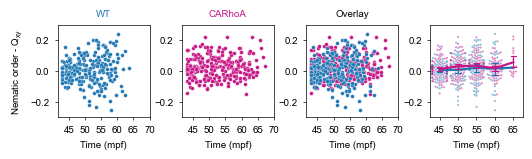

In [104]:
data_subset = data_collection.copy()
# data_subset = data_subset.loc[data_subset['cut_type']=='wt']
data_subset = data_subset.loc[data_subset['where']=='middle']
data_subset.loc[data_subset['orientation']=='perp', 'no_qxy'] = -data_subset.loc[data_subset['orientation']=='perp', 'no_qxy']
data_subset['time_bin'] = 5 * np.round(data_subset['mpf'] / 5).astype('int')
# data_subset['time_bin'] = (2.5 * np.round(data_subset['mpf'] / 2.5))

# plot
fig, axs = plt.subplots(1,4,figsize=[6, 1.2], gridspec_kw={'wspace': 0.35})
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'mpf', y = 'no_qxy', ax=axs[0], legend=False,
                s=7.5, color = 'tab:blue')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'mpf', y = 'no_qxy', ax=axs[1], legend=False,
                s=7.5, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'mpf', y = 'no_qxy', ax=axs[2], legend=False,
                s=7.5, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'mpf', y = 'no_qxy', ax=axs[2], legend=False,
                s=7.5, color = 'tab:blue')

# sns.swarmplot(data = data_subset, x = 'time_bin', y = 'no_qxx', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'])
sns.swarmplot(data = data_subset, x = 'time_bin', y = 'no_qxy', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
              size=1.5, alpha=0.5, zorder=5)
sns.pointplot(data = data_subset, x = 'time_bin', y = 'no_qxy', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
              estimator='mean', errorbar=('ci', 95), lw=1.6, marker='_', markersize=0, markeredgewidth=1,
              capsize=0.3, err_kws={'linewidth': 0.8}, zorder=6)

# sns.pointplot(data = data_subset, x = 'to_plot_x', y='rv',
#               color='black', ax=axs[3], zorder=10,
#               estimator='mean', errorbar=('ci', 95),
#               linestyle='none', marker="_", markersize=20, markeredgewidth=1,
#               capsize=0.3, err_kws={'linewidth': 0.8})
# sns.swarmplot(data = data_subset, x = 'time_bin', y = 'no_qxx', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'])


# axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)

axs[0].set_ylabel('Nematic order - $\\mathregular{Q_{xy}}$')
axs[3].set_ylabel('Nematic order - $\\mathregular{Q_{xy}}$')

[ax.set_ylabel('') for ax in axs[1:]]

axs[0].set_title('WT', fontsize=7, color='tab:blue')
axs[1].set_title('CARhoA', fontsize=7, color='mediumvioletred')
axs[2].set_title('Overlay', fontsize=7)

[ax.set_xlabel('Time (mpf)') for ax in axs]
[ax.set_xlim(41.5, 70) for ax in axs[:3]]
[ax.set_xticks(np.arange(45, 71, 5)) for ax in axs[:3]]
[ax.set_ylim(-0.3, 0.3) for ax in axs[:4]]
[ax.set_yticks(np.arange(-0.2, 0.35, 0.2)) for ax in axs[:4]]

plt.savefig('wt_carhoa_qxy-middle-time.svg')
plt.show()

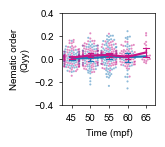

In [108]:
fig, ax = plt.subplots(figsize=[1.2, 1.2])
sns.swarmplot(data = data_subset, x = 'time_bin', y = 'no_qxy', ax=ax, hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
              size=1.5, alpha=0.5, zorder=5)
sns.pointplot(data = data_subset, x = 'time_bin', y = 'no_qxy', ax=ax, hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
              estimator='mean', errorbar=('ci', 95), lw=1.6, marker='_', markersize=0, markeredgewidth=1, zorder=6,
              capsize=0.3, err_kws={'linewidth': 0.8})
ax.set_ylim(-0.4, 0.4)
# ax.set_yticks(np.arange(-0.2, 0.7, 0.2))
ax.set_ylabel('Nematic order\n(Qyy)')
ax.set_xlabel('Time (mpf)')
plt.savefig('wt_carhoa_qxy-middle-time_separate.svg')

plt.show()

In [74]:
data_subset['bign'] = data_subset['experiment'] + data_subset['batch'].astype('int').astype('str')
data_subset['smalln'] = data_subset['experiment'] + data_subset['embryo_no'].astype('int').astype('str')

print('wt', len(np.unique(data_subset.loc[data_subset['cut_type']=='wt'].smalln)), len(np.unique(data_subset.loc[data_subset['cut_type']=='wt'].bign)), len(np.unique(data_subset.loc[data_subset['cut_type']=='wt'].experiment)))
print('carhoa', len(np.unique(data_subset.loc[data_subset['cut_type']=='carhoa'].smalln)), len(np.unique(data_subset.loc[data_subset['cut_type']=='carhoa'].bign)), len(np.unique(data_subset.loc[data_subset['cut_type']=='carhoa'].experiment)))

wt 145 21 8
carhoa 131 22 8


In [75]:
data_subset_stats = data_subset[['cut_type', 'time_bin', 'no_qxy']]

p_vals = []
for time_bin in np.unique(data_subset_stats['time_bin']):
    print(time_bin)
    groups = data_subset_stats[data_subset_stats['time_bin'] == time_bin]
    group1 = groups[groups['cut_type']=='wt'].no_qxy
    group2 = groups[groups['cut_type']=='carhoa'].no_qxy

    testgroup1, testgroup2 = group1, group2
    print('--Shapiro-Wilk test for normality--')
    stat, p = scipy.stats.shapiro(testgroup1)
    print("Control: W=%.3f, p=%.3f" % (stat, p))
    stat, p = scipy.stats.shapiro(testgroup2)
    print("Control: W=%.3f, p=%.3f" % (stat, p))
    # Levene’s test (center='median' is more robust to non-normal data)
    stat, p_val = scipy.stats.levene(testgroup1, testgroup2, center='mean')
    print('--Levene’s test for variance equity--')
    print("Levene’s test statistic =", stat)
    print("p-value =", p_val)
    # Mann–Whitney U test (two-sided)
    u_stat, p_val = scipy.stats.mannwhitneyu(testgroup1, testgroup2, alternative='two-sided')
    print('--Mann-Whitney U test (two-sided)--')
    print("Mann–Whitney U statistic =", u_stat)
    print("p-value =", p_val)
    print("Statistical test, Mann-Whitney test:", "***p < 0.001." if p_val<0.001 else f"p = {p_val:.3f}.")
    print(" ")

    p_vals.append(p_val)

# Your raw p-values
raw_pvals = np.array(p_vals)
print("Raw:", np.round(raw_pvals,5))

from statsmodels.stats.multitest import multipletests
# Bonferroni
rej_bonf, pvals_bonf, _, _ = multipletests(raw_pvals, alpha=0.05, method='bonferroni')
print("Bonferroni corrected:", np.round(pvals_bonf, 3))

45
--Shapiro-Wilk test for normality--
Control: W=0.988, p=0.708
Control: W=0.985, p=0.505
--Levene’s test for variance equity--
Levene’s test statistic = 1.6573816456246828
p-value = 0.19998047054805593
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 2644.0
p-value = 0.6360758351121123
Statistical test, Mann-Whitney test: p = 0.636.
 
50
--Shapiro-Wilk test for normality--
Control: W=0.982, p=0.497
Control: W=0.988, p=0.745
--Levene’s test for variance equity--
Levene’s test statistic = 1.2782300145062417
p-value = 0.2603589933253756
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 1799.0
p-value = 0.19534887430068504
Statistical test, Mann-Whitney test: p = 0.195.
 
55
--Shapiro-Wilk test for normality--
Control: W=0.984, p=0.514
Control: W=0.986, p=0.718
--Levene’s test for variance equity--
Levene’s test statistic = 9.64087074054139
p-value = 0.00233619974236849
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 2001.0
p-value = 0.4541349792

compare the tension in the surrounding cortex

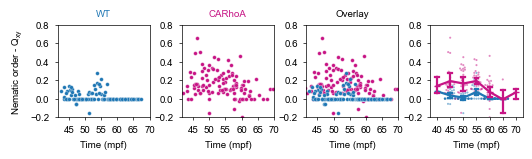

In [113]:
data_subset = data_collection.copy()
data_subset = data_subset.loc[data_subset['mpf']>37.5]
data_subset = data_subset.loc[data_subset['where']=='ac']
data_subset['time_bin'] = 5 * np.round(data_subset['mpf'] / 5).astype('int')
# data_subset['time_bin'] = (2.5 * np.round(data_subset['mpf'] / 2.5))

# plot
fig, axs = plt.subplots(1,4,figsize=[6, 1.2], gridspec_kw={'wspace': 0.35})
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'mpf', y = 'rv', ax=axs[0], legend=False,
                s=7.5, color = 'tab:blue')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'mpf', y = 'rv', ax=axs[1], legend=False,
                s=7.5, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'mpf', y = 'rv', ax=axs[2], legend=False,
                s=7.5, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'mpf', y = 'rv', ax=axs[2], legend=False,
                s=7.5, color = 'tab:blue')

# sns.swarmplot(data = data_subset, x = 'time_bin', y = 'no_qxx', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'])
sns.swarmplot(data = data_subset, x = 'time_bin', y = 'rv', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
              size=1.5, alpha=0.5, zorder=5)
sns.pointplot(data = data_subset, x = 'time_bin', y = 'rv', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
              estimator='mean', errorbar=('ci', 95), lw=1.6, marker='_', markersize=4, markeredgewidth=1,
              capsize=0.3, err_kws={'linewidth': 1.6}, zorder=6)

# sns.pointplot(data = data_subset, x = 'to_plot_x', y='rv',
#               color='black', ax=axs[3], zorder=10,
#               estimator='mean', errorbar=('ci', 95),
#               linestyle='none', marker="_", markersize=20, markeredgewidth=1,
#               capsize=0.3, err_kws={'linewidth': 0.8})
# sns.swarmplot(data = data_subset, x = 'time_bin', y = 'no_qxx', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'])


# axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)

axs[0].set_ylabel('Nematic order - $\\mathregular{Q_{xy}}$')
axs[3].set_ylabel('Nematic order - $\\mathregular{Q_{xy}}$')

[ax.set_ylabel('') for ax in axs[1:]]

axs[0].set_title('WT', fontsize=7, color='tab:blue')
axs[1].set_title('CARhoA', fontsize=7, color='mediumvioletred')
axs[2].set_title('Overlay', fontsize=7)

[ax.set_xlabel('Time (mpf)') for ax in axs]
[ax.set_xlim(41.5, 70) for ax in axs[:3]]
[ax.set_xticks(np.arange(45, 71, 5)) for ax in axs[:3]]
[ax.set_ylim(-0.2, 0.8) for ax in axs[:4]]
[ax.set_yticks(np.arange(-0.2, 0.9, 0.2)) for ax in axs[:4]]
# axs[3].set_xlim(0.5,7)

plt.savefig('wt_carhoa_rv-ac-time.svg')
plt.show()

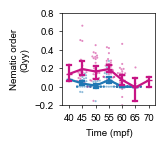

In [119]:
fig, ax = plt.subplots(figsize=[1.2, 1.2])
sns.swarmplot(data = data_subset, x = 'time_bin', y = 'rv', ax=ax, hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
              size=1.5, alpha=0.5, zorder=5)
sns.pointplot(data = data_subset, x = 'time_bin', y = 'rv', ax=ax, hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
              estimator='mean', errorbar=('ci', 95), lw=1.6, marker='_', markersize=4, markeredgewidth=1,
              capsize=0.3, err_kws={'linewidth': 1.6}, zorder=6)

ax.set_ylim(-0.2, 0.8)
ax.set_yticks(np.arange(-0.2, 0.9, 0.2))
ax.set_ylabel('Nematic order\n(Qyy)')
ax.set_xlabel('Time (mpf)')
plt.savefig('wt_carhoa_rv-ac-time_separate.svg')

plt.show()

In [86]:
data_subset['bign'] = data_subset['experiment'] + data_subset['batch'].astype('int').astype('str')
data_subset['smalln'] = data_subset['experiment'] + data_subset['embryo_no'].astype('int').astype('str')

print('wt',
      len(np.unique(data_subset.loc[data_subset['cut_type']=='wt'].experiment)),
      len(np.unique(data_subset.loc[data_subset['cut_type']=='wt'].bign)),
      len(np.unique(data_subset.loc[data_subset['cut_type']=='wt'].smalln)),
      len(data_subset.loc[data_subset['cut_type']=='wt']))

print('carhoa',
      len(np.unique(data_subset.loc[data_subset['cut_type']=='carhoa'].experiment)),
      len(np.unique(data_subset.loc[data_subset['cut_type']=='carhoa'].bign)),
      len(np.unique(data_subset.loc[data_subset['cut_type']=='carhoa'].smalln)),
      len(data_subset.loc[data_subset['cut_type']=='carhoa']))


wt 2 5 48 104
carhoa 7 14 67 116


In [87]:
data_subset_stats = data_subset[['cut_type', 'time_bin', 'rv']]

p_vals = []
for time_bin in np.unique(data_subset_stats['time_bin']):
    print(time_bin)
    groups = data_subset_stats[data_subset_stats['time_bin'] == time_bin]
    group1 = groups[groups['cut_type']=='wt'].rv
    group2 = groups[groups['cut_type']=='carhoa'].rv

    testgroup1, testgroup2 = group1, group2
    print('--Shapiro-Wilk test for normality--')
    stat, p = scipy.stats.shapiro(testgroup1)
    print("Control: W=%.3f, p=%.3f" % (stat, p))
    stat, p = scipy.stats.shapiro(testgroup2)
    print("Control: W=%.3f, p=%.3f" % (stat, p))
    # Levene’s test (center='median' is more robust to non-normal data)
    stat, p_val = scipy.stats.levene(testgroup1, testgroup2, center='mean')
    print('--Levene’s test for variance equity--')
    print("Levene’s test statistic =", stat)
    print("p-value =", p_val)
    # Mann–Whitney U test (two-sided)
    u_stat, p_val = scipy.stats.mannwhitneyu(testgroup1, testgroup2, alternative='two-sided')
    print('--Mann-Whitney U test (two-sided)--')
    print("Mann–Whitney U statistic =", u_stat)
    print("p-value =", p_val)
    print("Statistical test, Mann-Whitney test:", "***p < 0.001." if p_val<0.001 else f"p = {p_val:.3f}.")
    print(" ")

    p_vals.append(p_val)
    
# Your raw p-values
raw_pvals = np.array(p_vals)
print("Raw:", np.round(raw_pvals,5))

from statsmodels.stats.multitest import multipletests
# Bonferroni
rej_bonf, pvals_bonf, _, _ = multipletests(raw_pvals, alpha=0.05, method='bonferroni')
print("Bonferroni corrected:", np.round(pvals_bonf, 3))

40
--Shapiro-Wilk test for normality--
Control: W=nan, p=nan
Control: W=0.962, p=0.623
--Levene’s test for variance equity--
Levene’s test statistic = 1.9710530370922703
p-value = 0.29547515760516274
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 1.0
p-value = 1.0
Statistical test, Mann-Whitney test: p = 1.000.
 
45
--Shapiro-Wilk test for normality--
Control: W=0.901, p=0.026
Control: W=0.833, p=0.003
--Levene’s test for variance equity--
Levene’s test statistic = 11.625778006309188
p-value = 0.0014718389017357098
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 70.0
p-value = 8.625226811568253e-05
Statistical test, Mann-Whitney test: ***p < 0.001.
 
50
--Shapiro-Wilk test for normality--
Control: W=0.679, p=0.000
Control: W=0.900, p=0.016
--Levene’s test for variance equity--
Levene’s test statistic = 16.87075407982837
p-value = 0.00016255276221867576
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 83.5
p-value = 2.0519278428345197e-05
Sta

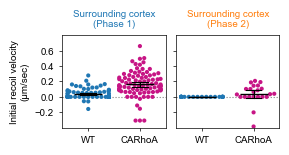

In [21]:
data_subset = data_collection.copy()
data_subset = data_subset.loc[data_subset['where'] == 'ac']
data_subset_phase1 = data_subset.loc[(data_subset['mpf']>42.5) & (data_subset['mpf']<60)]
data_subset_phase2 = data_subset.loc[(data_subset['mpf']>60) & (data_subset['mpf']<1000)]

# plot
fig, axs = plt.subplots(1,2,figsize=[2.8, 1.2], gridspec_kw={'wspace': 0.1}, sharey=True)
sns.swarmplot(data = data_subset_phase1, x = 'cut_type', y ='rv', ax = axs[0], size=3, hue = 'cut_type', legend=False,
              order = ['wt', 'carhoa'], palette = ['mediumvioletred', 'tab:blue'])
sns.pointplot(data = data_subset_phase1, x = 'cut_type', y ='rv',
              color='black', ax=axs[0], zorder=100,
              estimator='mean', errorbar=('ci', 95),
              linestyle='none', marker="_", markersize=20, markeredgewidth=1,
              capsize=0.3, err_kws={'linewidth': 0.8})

sns.swarmplot(data = data_subset_phase2, x = 'cut_type', y ='rv', ax = axs[1], size=3, hue = 'cut_type', legend=False,
              order = ['wt', 'carhoa'], palette = ['mediumvioletred', 'tab:blue'])
sns.pointplot(data = data_subset_phase2, x = 'cut_type', y ='rv',
              color='black', ax= axs[1], zorder=100,
              estimator='mean', errorbar=('ci', 95),
              linestyle='none', marker="_", markersize=20, markeredgewidth=1,
              capsize=0.3, err_kws={'linewidth': 0.8})


[ax.set_xticks(range(2)) for ax in axs]
[ax.set_xticklabels(['WT', 'CARhoA']) for ax in axs]
[ax.set_ylim(-0.4, 0.8) for ax in axs[0:2]]
[ax.set_yticks(np.arange(-0.2, 0.7, 0.2)) for ax in axs[0:2]]
[ax.axhline(y=0, ls=':', color='grey', zorder=-10, lw=0.8) for ax in axs]

[ax.set_xlabel('', fontsize=7) for ax in axs]
axs[0].set_ylabel('Initial recoil velocity\n(\u03bcm/sec)', fontsize=7)
[ax.set_ylabel('', fontsize=7) for ax in axs[1:]]

# fig.suptitle('Surrounding cortex\n(Phase 2)', fontsize=12)
axs[0].set_title('Surrounding cortex\n(Phase 1)', fontsize=7, color='tab:blue')
axs[1].set_title('Surrounding cortex\n(Phase 2)', fontsize=7, color='tab:orange')

# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)
plt.savefig('wt_carhoa_rv-ac-phase12.svg')
plt.show()

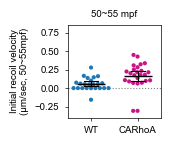

In [93]:
data_subset = data_collection.copy()
data_subset = data_subset.loc[data_subset['where'] == 'ac']
data_subset = data_subset.loc[(data_subset['mpf']>42.5+10-2.5) & (data_subset['mpf']<42.5+10+2.5)]


# plot
fig, ax = plt.subplots(figsize=[1.2, 1.2])

sns.swarmplot(data = data_subset, x = 'cut_type', y ='rv', ax = ax, size=3, hue = 'cut_type', legend=False,
              order = ['wt', 'carhoa'], palette = ['mediumvioletred', 'tab:blue'])
sns.pointplot(data = data_subset, x = 'cut_type', y ='rv',
              color='black', ax=ax, zorder=100,
              estimator='mean', errorbar=('ci', 95),
              linestyle='none', marker="_", markersize=20, markeredgewidth=1,
              capsize=0.3, err_kws={'linewidth': 0.8})


ax.set_xticks(range(2))
ax.set_xticklabels(['WT', 'CARhoA'])
ax.set_ylim(-0.4, 0.85)
ax.set_yticks([-0.25, 0, 0.25, 0.5, 0.75])
ax.set_xlabel('')
ax.axhline(y=0, ls=':', color='grey', zorder=-10, lw=0.8)

ax.set_ylabel('Initial recoil velocity\n(\u03bcm/sec, 50~55mpf)', fontsize=7)

# fig.suptitle('Surrounding cortex\n(Phase 2)', fontsize=12)
ax.set_title('50~55 mpf', fontsize=7)

# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)
plt.savefig('wt_carhoa_rv-ac-50-55.svg')
plt.show()

In [23]:
data_subset['bign'] = data_subset['experiment'] + data_subset['batch'].astype('int').astype('str')
data_subset['smalln'] = data_subset['experiment'] + data_subset['embryo_no'].astype('int').astype('str')

print('wt',
      len(np.unique(data_subset[data_subset['cut_type'] == 'wt'].experiment)),
      len(np.unique(data_subset[data_subset['cut_type'] == 'wt'].bign)),
      len(np.unique(data_subset[data_subset['cut_type'] == 'wt'].smalln)),
      len(data_subset[data_subset['cut_type'] == 'wt']))
print('carhoa',
      len(np.unique(data_subset[data_subset['cut_type'] == 'carhoa'].experiment)),
      len(np.unique(data_subset[data_subset['cut_type'] == 'carhoa'].bign)),
      len(np.unique(data_subset[data_subset['cut_type'] == 'carhoa'].smalln)),
      len(data_subset[data_subset['cut_type'] == 'carhoa']))

wt 2 5 14 23
carhoa 6 11 21 25


In [24]:
group1 = data_subset[data_subset['cut_type'] == 'wt'].rv #wt
group2 = data_subset[data_subset['cut_type'] == 'carhoa'].rv #carhoa

In [25]:
# statistics
# Shapiro-Wilk test
stat_group1, p_group1 = scipy.stats.shapiro(group1)
stat_group2, p_group2 = scipy.stats.shapiro(group2)

print('--Shapiro-Wilk test for normality--')
print("Control: W=%.3f, p=%.3f" % (stat_group1, p_group1))
print("CARhoA: W=%.3f, p=%.3f" % (stat_group2, p_group2))
print(' ')

# Rule of thumb:
# If p > 0.05 → data are not significantly different from normal (i.e. approx. normal).
# If p <= 0.05 → reject normality assumption.

# Optional: visualize with histogram + QQ-plot
# fig, axs = plt.subplots(2, 2, figsize=(10,6))

# sns.histplot(group1, kde=True, ax=axs[0,0])
# axs[0,0].set_title("Control histogram")
# scipy.stats.probplot(group1, dist="norm", plot=axs[0,1])
# axs[0,1].set_title("Control QQ-plot")

# sns.histplot(group2, kde=True, ax=axs[1,0])
# axs[1,0].set_title("CARhoA histogram")
# scipy.stats.probplot(group2, dist="norm", plot=axs[1,1])
# axs[1,1].set_title("CARhoA QQ-plot")

# plt.tight_layout()
# plt.show()

# Levene’s test (center='median' is more robust to non-normal data)
stat, p_val = scipy.stats.levene(group1, group2, center='median')

print('--Levene’s test for variance equity--')
print("Levene’s test statistic =", stat)
print("p-value =", p_val)
print(" ")

# Mann–Whitney U test (two-sided)
u_stat, p_val = scipy.stats.mannwhitneyu(group1, group2, alternative='two-sided')
print('--Mann-Whitney U test (two-sided)--')
print("Mann–Whitney U statistic =", u_stat)
print("p-value =", p_val)
print(" ")

print("Statistical test, Mann-Whitney test:", "***p < 0.001." if p_val<0.001 else f"p = {p_val:.3f}.")

# Interpretation:
# If p < 0.05 → significant difference between groups
# If p >= 0.05 → no significant difference

--Shapiro-Wilk test for normality--
Control: W=0.901, p=0.027
CARhoA: W=0.869, p=0.004
 
--Levene’s test for variance equity--
Levene’s test statistic = 3.8893029580499054
p-value = 0.05462440190084346
 
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 104.0
p-value = 0.00015345018770526853
 
Statistical test, Mann-Whitney test: ***p < 0.001.


compare band, cortex,

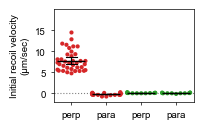

In [129]:
data_subset = data_collection.copy()
data_subset = data_subset.loc[data_subset['cut_type'] == 'wt']
data_subset = data_subset.loc[(data_subset['mpf']>42.5+10-2.5) & (data_subset['mpf']<42.5+10+2.5)]
data_subset['to_plot_x'] = data_subset['where'] + data_subset['orientation']
data_subset = data_subset.loc[data_subset['to_plot_x'].isin(['middleperp', 'middlepara', 'acperp', 'acpara'])]

fig, ax = plt.subplots(figsize=[1.8, 1.2], gridspec_kw={'wspace': 0.35})
sns.swarmplot(data = data_subset, x = 'to_plot_x', y ='rv', ax = ax, size=3, hue = 'where', legend=False,
              palette = ['tab:red', 'tab:green'])
sns.pointplot(data = data_subset, x = 'to_plot_x', y='rv',
              color='black', ax=ax, zorder=10,
              estimator='mean', errorbar=('ci', 95),
              linestyle='none', marker="_", markersize=20, markeredgewidth=1,
              capsize=0.3, err_kws={'linewidth': 0.8})

ax.axhline(y=0, ls=':', color='grey', zorder=-10, lw=0.8)

ax.set_xticks(range(4))
ax.set_xticklabels(['perp', 'para', 'perp', 'para'])
ax.set_ylim(-2, 20)
ax.set_yticks(np.arange(0, 16, 5)) 

ax.set_xlabel('', fontsize=7)
ax.set_ylabel('Initial recoil velocity\n(\u03bcm/sec)', fontsize=7)

plt.savefig('cb_ac_perp_para.svg')
plt.show()

In [130]:
group1 = data_subset.loc[data_subset['to_plot_x'] == 'middleperp'].rv
group2 = data_subset.loc[data_subset['to_plot_x'] == 'middlepara'].rv
group3 = data_subset.loc[data_subset['to_plot_x'] == 'acperp'].rv
group4 = data_subset.loc[data_subset['to_plot_x'] == 'acpara'].rv

stat, p_val = scipy.stats.kruskal(group1, group2, group3, group4)
print(f"Kruskal–Wallis: H={stat:.3f}, p={p_val:.4f}")

import itertools
from statsmodels.stats.multitest import multipletests

groups = {"g1": group1, "g2": group2, "g3": group3, "g4": group4}
pairs = list(itertools.combinations(groups.keys(), 2))

raw_pvals = []
labels = []

for a, b in pairs:
    stat, p = scipy.stats.mannwhitneyu(groups[a], groups[b], alternative="two-sided")
    raw_pvals.append(p)
    labels.append(f"{a} vs {b}")

# Holm–Bonferroni correction
rej, pvals_corrected, _, _ = multipletests(raw_pvals, alpha=0.05, method="bonferroni")

# Report results
for lbl, raw, adj, r in zip(labels, raw_pvals, pvals_corrected, rej):
    print(f"{lbl}: raw p={raw:.4f}, adj p={adj:.4f}, significant={r}")

Kruskal–Wallis: H=68.860, p=0.0000
g1 vs g2: raw p=0.0000, adj p=0.0000, significant=True
g1 vs g3: raw p=0.0000, adj p=0.0000, significant=True
g1 vs g4: raw p=0.0000, adj p=0.0000, significant=True
g2 vs g3: raw p=0.0046, adj p=0.0274, significant=True
g2 vs g4: raw p=0.0009, adj p=0.0053, significant=True
g3 vs g4: raw p=0.4892, adj p=1.0000, significant=False


In [183]:
data_subset['bign'] = data_subset['experiment'] + data_subset['batch'].astype('int').astype('str')
data_subset['smalln'] = data_subset['experiment'] + data_subset['embryo_no'].astype('int').astype('str')

# data_subset['smalln'] = data_subset['experiment'] + data_subset['batch'].astype('int').astype('str')+ data_subset['embryo_no'].astype('int').astype('str')

print('acperp',
      len(np.unique(data_subset.loc[data_subset['to_plot_x']=='acperp'].experiment)),
      len(np.unique(data_subset.loc[data_subset['to_plot_x']=='acperp'].bign)),
      len(np.unique(data_subset.loc[data_subset['to_plot_x']=='acperp'].smalln)),
      len(data_subset.loc[data_subset['to_plot_x']=='acperp']))
print('acpara',
       len(np.unique(data_subset.loc[data_subset['to_plot_x']=='acpara'].experiment)),
      len(np.unique(data_subset.loc[data_subset['to_plot_x']=='acpara'].bign)),
      len(np.unique(data_subset.loc[data_subset['to_plot_x']=='acpara'].smalln)),
      len(data_subset.loc[data_subset['to_plot_x']=='acpara']))
print('middleperp',
      len(np.unique(data_subset.loc[data_subset['to_plot_x']=='middleperp'].experiment)),
      len(np.unique(data_subset.loc[data_subset['to_plot_x']=='middleperp'].bign)),
      len(np.unique(data_subset.loc[data_subset['to_plot_x']=='middleperp'].smalln)),
      len(data_subset.loc[data_subset['to_plot_x']=='middleperp']))
print('middlepara',
      len(np.unique(data_subset.loc[data_subset['to_plot_x']=='middlepara'].experiment)),
      len(np.unique(data_subset.loc[data_subset['to_plot_x']=='middlepara'].bign)),
      len(np.unique(data_subset.loc[data_subset['to_plot_x']=='middlepara'].smalln)),
      len(data_subset.loc[data_subset['to_plot_x']=='middlepara']))

acperp 2 5 11 11
acpara 2 5 12 12
middleperp 5 13 31 37
middlepara 4 8 28 28


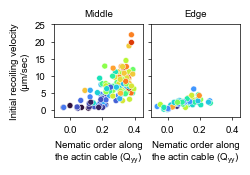

In [185]:
data_subset = data_collection.copy()
data_subset = data_subset.loc[data_subset['cut_type'] == 'wt']
data_subset = data_subset.loc[data_subset['orientation']=='perp']
data_subset = data_subset.loc[data_subset['where'].isin(['middle', 'edge'])]

# plot
fig, axs = plt.subplots(1,2,figsize=[2.4, 1.2], gridspec_kw={'wspace': 0.1}, sharey=True)
sns.scatterplot(data = data_subset.loc[data_subset['where']=='middle'], x = 'no_qxx', y = 'rv', ax=axs[0], legend=False,
                size=0.05,
                hue = 'mpf', hue_norm = (43, 65), palette = 'turbo')
sns.scatterplot(data = data_subset.loc[data_subset['where']=='edge'], x = 'no_qxx', y = 'rv', ax=axs[1], legend=False,
                size=0.05,
                hue = 'mpf', hue_norm = (43, 65), palette = 'turbo')


axs[0].set_ylabel('Initial recoiling velocity\n(\u03BCm/sec)')
# axs[1].set_ylabel('')
# axs[2].set_ylabel('')

axs[0].set_title('Middle', fontsize=7)
axs[1].set_title('Edge', fontsize=7)
# axs[2].set_title('Overlay', fontsize=12)


[ax.set_xlabel('Nematic order along\nthe actin cable ($\\mathregular{Q_{yy}}$)') for ax in axs]
[ax.set_xlim(-0.1, 0.45) for ax in axs]
[ax.set_xticks(np.arange(0, 0.5, 0.2)) for ax in axs]
[ax.set_ylim(-2, 25) for ax in axs]
[ax.set_yticks(np.arange(0, 26, 5)) for ax in axs]

# [ax.set_yscale('log') for ax in axs]
plt.savefig('wt_middle-edge_qyy-rvperp.svg')
plt.show()


In [186]:
data_subset['bign'] = data_subset['experiment'] + data_subset['batch'].astype('int').astype('str')
data_subset['smalln'] = data_subset['experiment'] + data_subset['embryo_no'].astype('int').astype('str')

print('middle',
      len(np.unique(data_subset.loc[data_subset['where']=='middle'].experiment)),
      len(np.unique(data_subset.loc[data_subset['where']=='middle'].bign)),
      len(np.unique(data_subset.loc[data_subset['where']=='middle'].smalln)),
      len(data_subset.loc[data_subset['where']=='middle']))
print('edge',
      len(np.unique(data_subset.loc[data_subset['where']=='edge'].experiment)),
      len(np.unique(data_subset.loc[data_subset['where']=='edge'].bign)),
      len(np.unique(data_subset.loc[data_subset['where']=='edge'].smalln)),
      len(data_subset.loc[data_subset['where']=='edge']))

middle 5 14 87 134
edge 5 12 39 49


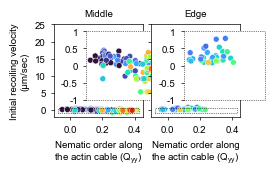

In [187]:
data_subset = data_collection.copy()
data_subset = data_subset.loc[data_subset['cut_type'] == 'wt']
data_subset = data_subset.loc[data_subset['orientation']=='para']
data_subset['no_qxx'] = -data_subset['no_qxx']
data_subset = data_subset.loc[data_subset['where'].isin(['middle', 'edge'])]

# plot
fig, axs = plt.subplots(1,2,figsize=[2.4, 1.2], gridspec_kw={'wspace': 0.1}, sharey=True)
sns.scatterplot(data = data_subset.loc[data_subset['where']=='middle'], x = 'no_qxx', y = 'rv', ax=axs[0], legend=False,
                size=0.05,
                hue = 'mpf', hue_norm = (43, 65), palette = 'turbo')
sns.scatterplot(data = data_subset.loc[data_subset['where']=='edge'], x = 'no_qxx', y = 'rv', ax=axs[1], legend=False,
                size=0.05,
                hue = 'mpf', hue_norm = (43, 65), palette = 'turbo')


axs[0].set_ylabel('Initial recoiling velocity\n(\u03BCm/sec)')
axs[0].set_title('Middle', fontsize=7)
axs[1].set_title('Edge', fontsize=7)
[ax.set_xlabel('Nematic order along\nthe actin cable ($\\mathregular{Q_{yy}}$)') for ax in axs]
[ax.set_xlim(-0.1, 0.45) for ax in axs]
[ax.set_xticks(np.arange(0, 0.5, 0.2)) for ax in axs]
[ax.set_ylim(-2, 25) for ax in axs]
[ax.set_yticks(np.arange(0, 26, 5)) for ax in axs]

# insets
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
axins = axs[0].inset_axes([0.1, 3, 0.43+0.075, 20], transform=axs[0].transData,
                          xlim=[-0.075, 0.43], ylim=[-1, 1],
                          xticks=[], xticklabels=[],
                          yticks=[-1, -0.5, 0, 0.5, 1], yticklabels=[-1, -0.5, 0, 0.5, 1],
                          xlabel=' ', ylabel=' ', zorder=10)
axs[0].add_patch(plt.Rectangle( (-0.075, -1), 0.43-(-0.075), 0.6-(-1), fill=False, clip_on=False, color = 'black', lw=0.5, ls=':', zorder=20))
for spine in axins.spines.values():
    spine.set_color('black') 
    spine.set_linewidth(0.5)
    spine.set_linestyle(':')
    spine.set_capstyle('butt')

axins1 = axs[1].inset_axes([0.1, 3, 0.43+0.075, 20], transform=axs[1].transData,
                          xlim=[-0.075, 0.43], ylim=[-1, 1],
                          xticks=[], xticklabels=[],
                          yticks=[-1, -0.5, 0, 0.5, 1], yticklabels=[-1, -0.5, 0, 0.5, 1],
                          xlabel=' ', ylabel=' ', zorder=10)
axs[1].add_patch(plt.Rectangle( (-0.075, -1), 0.43-(-0.075), 0.6-(-1), fill=False, clip_on=False, color = 'black', lw=0.5, ls=':', zorder=20))
for spine in axins1.spines.values():
    spine.set_color('black') 
    spine.set_linewidth(0.5)
    spine.set_linestyle(':')
    spine.set_capstyle('butt')

sns.scatterplot(data = data_subset.loc[data_subset['where']=='middle'], x = 'no_qxx', y = 'rv', ax=axins, legend=False,
                size=0.05,
                hue = 'mpf', hue_norm = (43, 65), palette = 'turbo')
sns.scatterplot(data = data_subset.loc[data_subset['where']=='edge'], x = 'no_qxx', y = 'rv', ax=axins1, legend=False,
                size=0.05,
                hue = 'mpf', hue_norm = (43, 65), palette = 'turbo')

plt.savefig('wt_middle-edge_qyy-rvpara.svg')
plt.show()


In [188]:
data_subset['bign'] = data_subset['experiment'] + data_subset['batch'].astype('int').astype('str')
data_subset['smalln'] = data_subset['experiment'] + data_subset['embryo_no'].astype('int').astype('str')

print('middle',
      len(np.unique(data_subset.loc[data_subset['where']=='middle'].experiment)),
      len(np.unique(data_subset.loc[data_subset['where']=='middle'].bign)),
      len(np.unique(data_subset.loc[data_subset['where']=='middle'].smalln)),
      len(data_subset.loc[data_subset['where']=='middle']))
print('edge',
      len(np.unique(data_subset.loc[data_subset['where']=='edge'].experiment)),
      len(np.unique(data_subset.loc[data_subset['where']=='edge'].bign)),
      len(np.unique(data_subset.loc[data_subset['where']=='edge'].smalln)),
      len(data_subset.loc[data_subset['where']=='edge']))

middle 5 10 59 102
edge 4 8 33 34


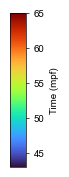

In [26]:
fig, ax = plt.subplots(figsize=(0.2, 2), layout='constrained')
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=43, vmax=65),
                                   cmap='turbo'),
                                   cax=ax, orientation='vertical')
ax.set_ylabel('Time (mpf)', fontsize=7)
# ax.set_yticks(np.arange(0,330,50))
plt.savefig('wt_middle-edge_qyy-rvperp_colorbar.svg')
plt.show()

compare the tension in the band middle, perp

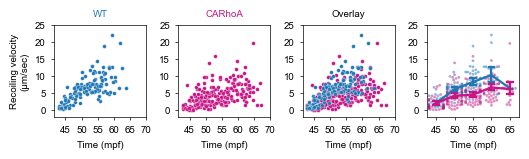

In [79]:
data_subset = data_collection.copy()
# data_subset = data_subset.loc[data_subset['cut_type']=='wt']
data_subset = data_subset.loc[(data_subset['where']=='middle') & (data_subset['orientation']=='perp')]
data_subset['time_bin'] = 5 * np.round(data_subset['mpf'] / 5).astype('int')


# plot
fig, axs = plt.subplots(1,4,figsize=[6, 1.2], gridspec_kw={'wspace': 0.35})
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'mpf', y = 'rv', ax=axs[0], legend=False,
                s=7.5, color = 'tab:blue')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'mpf', y = 'rv', ax=axs[1], legend=False,
                s=7.5, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'mpf', y = 'rv', ax=axs[2], legend=False,
                s=7.5, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'mpf', y = 'rv', ax=axs[2], legend=False,
                s=7.5, color = 'tab:blue')

sns.swarmplot(data = data_subset, x = 'time_bin', y = 'rv', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
              size=2, alpha=0.5, zorder=5)
sns.pointplot(data = data_subset, x = 'time_bin', y = 'rv', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
              estimator='mean', errorbar=('ci', 95), lw=1.6, marker='_', markersize=4, markeredgewidth=1,
              capsize=0.3, err_kws={'linewidth': 1.6}, zorder=6)

axs[0].set_ylabel('Recoiling velocity\n(\u03BCm/sec)')
axs[1].set_ylabel('')
axs[2].set_ylabel('')
axs[3].set_ylabel('')

axs[0].set_title('WT', fontsize=7, color='tab:blue')
axs[1].set_title('CARhoA', fontsize=7, color='mediumvioletred')
axs[2].set_title('Overlay', fontsize=7)


[ax.set_xlabel('Time (mpf)') for ax in axs]
[ax.set_xlim(41.5, 70) for ax in axs[:3]]
[ax.set_xticks(np.arange(45, 71, 5)) for ax in axs[:3]]
[ax.set_ylim(-2, 25) for ax in axs[:4]]
[ax.set_yticks(np.arange(0, 26, 5)) for ax in axs[:4]]

plt.savefig('wt_carhoa_rv-middle-perp-time.svg')
plt.show()

In [80]:
data_subset['bign'] = data_subset['experiment'] + data_subset['batch'].astype('int').astype('str')
data_subset['smalln'] = data_subset['experiment'] + data_subset['embryo_no'].astype('int').astype('str')

print('wt',
      len(np.unique(data_subset.loc[data_subset['cut_type']=='wt'].experiment)),
      len(np.unique(data_subset.loc[data_subset['cut_type']=='wt'].bign)),
      len(np.unique(data_subset.loc[data_subset['cut_type']=='wt'].smalln)),
      len(data_subset.loc[data_subset['cut_type']=='wt']))

print('carhoa',
      len(np.unique(data_subset.loc[data_subset['cut_type']=='carhoa'].experiment)),
      len(np.unique(data_subset.loc[data_subset['cut_type']=='carhoa'].bign)),
      len(np.unique(data_subset.loc[data_subset['cut_type']=='carhoa'].smalln)),
      len(data_subset.loc[data_subset['cut_type']=='carhoa']))


wt 5 14 87 134
carhoa 8 21 110 202


In [81]:
data_subset_stats = data_subset[['cut_type', 'time_bin', 'rv']]

p_vals = []
for time_bin in np.unique(data_subset_stats['time_bin']):
    print(time_bin)
    groups = data_subset_stats[data_subset_stats['time_bin'] == time_bin]
    group1 = groups[groups['cut_type']=='wt'].rv
    group2 = groups[groups['cut_type']=='carhoa'].rv

    testgroup1, testgroup2 = group1, group2
    print('--Shapiro-Wilk test for normality--')
    stat, p = scipy.stats.shapiro(testgroup1)
    print("Control: W=%.3f, p=%.3f" % (stat, p))
    stat, p = scipy.stats.shapiro(testgroup2)
    print("Control: W=%.3f, p=%.3f" % (stat, p))
    # Levene’s test (center='median' is more robust to non-normal data)
    stat, p_val = scipy.stats.levene(testgroup1, testgroup2, center='mean')
    print('--Levene’s test for variance equity--')
    print("Levene’s test statistic =", stat)
    print("p-value =", p_val)
    # Mann–Whitney U test (two-sided)
    u_stat, p_val = scipy.stats.mannwhitneyu(testgroup1, testgroup2, alternative='two-sided')
    print('--Mann-Whitney U test (two-sided)--')
    print("Mann–Whitney U statistic =", u_stat)
    print("p-value =", p_val)
    print("Statistical test, Mann-Whitney test:", "***p < 0.001." if p_val<0.001 else f"p = {p_val:.3f}.")
    print(" ")

    p_vals.append(p_val)

    # Your raw p-values
raw_pvals = np.array(p_vals)
print("Raw:", np.round(raw_pvals,5))

from statsmodels.stats.multitest import multipletests
# Bonferroni
rej_bonf, pvals_bonf, _, _ = multipletests(raw_pvals, alpha=0.05, method='bonferroni')
print("Bonferroni corrected:", np.round(pvals_bonf, 3))

45
--Shapiro-Wilk test for normality--
Control: W=0.868, p=0.001
Control: W=0.850, p=0.000
--Levene’s test for variance equity--
Levene’s test statistic = 0.8203996840556597
p-value = 0.3682615679228318
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 647.5
p-value = 0.6671279925272552
Statistical test, Mann-Whitney test: p = 0.667.
 
50
--Shapiro-Wilk test for normality--
Control: W=0.974, p=0.522
Control: W=0.922, p=0.002
--Levene’s test for variance equity--
Levene’s test statistic = 5.014227703022276
p-value = 0.027576798159473
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 1586.5
p-value = 2.3472595504787766e-05
Statistical test, Mann-Whitney test: ***p < 0.001.
 
55
--Shapiro-Wilk test for normality--
Control: W=0.947, p=0.038
Control: W=0.868, p=0.000
--Levene’s test for variance equity--
Levene’s test statistic = 1.400316640083273
p-value = 0.23971934492487953
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 1864.5
p-value = 8.1797534

compare the tension in the band middle, para

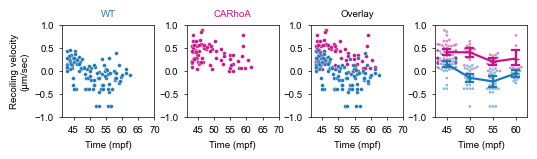

In [120]:
data_subset = data_collection.copy()
# data_subset = data_subset.loc[data_subset['cut_type']=='wt']
data_subset = data_subset.loc[(data_subset['where']=='middle') & (data_subset['orientation']=='para')]
data_subset['time_bin'] = 5 * np.round(data_subset['mpf'] / 5).astype('int')


# plot
fig, axs = plt.subplots(1,4,figsize=[6, 1.2], gridspec_kw={'wspace': 0.35})
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'mpf', y = 'rv', ax=axs[0], legend=False,
                s=7.5, color = 'tab:blue')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'mpf', y = 'rv', ax=axs[1], legend=False,
                s=7.5, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'mpf', y = 'rv', ax=axs[2], legend=False,
                s=7.5, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'mpf', y = 'rv', ax=axs[2], legend=False,
                s=7.5, color = 'tab:blue')

sns.swarmplot(data = data_subset, x = 'time_bin', y = 'rv', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
              size=2, alpha=0.5, zorder=5)
sns.pointplot(data = data_subset, x = 'time_bin', y = 'rv', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
              estimator='mean', errorbar=('ci', 95), lw=1.6, marker='_', markersize=4, markeredgewidth=1,
              capsize=0.3, err_kws={'linewidth': 1.6}, zorder=6)

axs[0].set_ylabel('Recoiling velocity\n(\u03BCm/sec)')
axs[1].set_ylabel('')
axs[2].set_ylabel('')
axs[3].set_ylabel('')

axs[0].set_title('WT', fontsize=7, color='tab:blue')
axs[1].set_title('CARhoA', fontsize=7, color='mediumvioletred')
axs[2].set_title('Overlay', fontsize=7)


[ax.set_xlabel('Time (mpf)') for ax in axs]
[ax.set_xlim(41.5, 70) for ax in axs[:3]]
[ax.set_xticks(np.arange(45, 71, 5)) for ax in axs[:3]]
[ax.set_ylim(-1, 1) for ax in axs[:4]]

plt.savefig('wt_carhoa_rv-middle-para-time.svg')
plt.show()

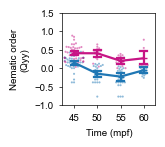

In [127]:
fig, ax = plt.subplots(figsize=[1.2, 1.2])
sns.swarmplot(data = data_subset, x = 'time_bin', y = 'rv', ax=ax, hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
              size=1.5, alpha=0.5, zorder=5)
sns.pointplot(data = data_subset, x = 'time_bin', y = 'rv', ax=ax, hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
              estimator='mean', errorbar=('ci', 95), lw=1.6, marker='_', markersize=4, markeredgewidth=1,
              capsize=0.3, err_kws={'linewidth': 1.6}, zorder=6)

ax.set_ylim(-1, 1.5)
ax.set_yticks(np.arange(-1, 1.6, 0.5))
ax.set_ylabel('Nematic order\n(Qyy)')
ax.set_xlabel('Time (mpf)')
plt.savefig('wt_carhoa_rv-middlepara-time_separate.svg')

plt.show()

In [84]:
data_subset_stats = data_subset[['cut_type', 'time_bin', 'rv']]

p_vals = []
for time_bin in np.unique(data_subset_stats['time_bin']):
    print(time_bin)
    groups = data_subset_stats[data_subset_stats['time_bin'] == time_bin]
    group1 = groups[groups['cut_type']=='wt'].rv
    group2 = groups[groups['cut_type']=='carhoa'].rv

    testgroup1, testgroup2 = group1, group2
    print('--Shapiro-Wilk test for normality--')
    stat, p = scipy.stats.shapiro(testgroup1)
    print("Control: W=%.3f, p=%.3f" % (stat, p))
    stat, p = scipy.stats.shapiro(testgroup2)
    print("Control: W=%.3f, p=%.3f" % (stat, p))
    # Levene’s test (center='median' is more robust to non-normal data)
    stat, p_val = scipy.stats.levene(testgroup1, testgroup2, center='mean')
    print('--Levene’s test for variance equity--')
    print("Levene’s test statistic =", stat)
    print("p-value =", p_val)
    # Mann–Whitney U test (two-sided)
    u_stat, p_val = scipy.stats.mannwhitneyu(testgroup1, testgroup2, alternative='two-sided')
    print('--Mann-Whitney U test (two-sided)--')
    print("Mann–Whitney U statistic =", u_stat)
    print("p-value =", p_val)
    print("Statistical test, Mann-Whitney test:", "***p < 0.001." if p_val<0.001 else f"p = {p_val:.3f}.")
    print(" ")

    p_vals.append(p_val)

    # Your raw p-values
raw_pvals = np.array(p_vals)
print("Raw:", np.round(raw_pvals,5))

from statsmodels.stats.multitest import multipletests
# Bonferroni
rej_bonf, pvals_bonf, _, _ = multipletests(raw_pvals, alpha=0.05, method='bonferroni')
print("Bonferroni corrected:", np.round(pvals_bonf, 3))

45
--Shapiro-Wilk test for normality--
Control: W=0.896, p=0.002
Control: W=0.966, p=0.258
--Levene’s test for variance equity--
Levene’s test statistic = 1.1119070311395252
p-value = 0.2949653120786328
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 301.0
p-value = 2.7946470789166355e-06
Statistical test, Mann-Whitney test: ***p < 0.001.
 
50
--Shapiro-Wilk test for normality--
Control: W=0.911, p=0.042
Control: W=0.913, p=0.203
--Levene’s test for variance equity--
Levene’s test statistic = 0.5374655420799249
p-value = 0.4685098452074714
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 6.5
p-value = 2.6345092196477833e-06
Statistical test, Mann-Whitney test: ***p < 0.001.
 
55
--Shapiro-Wilk test for normality--
Control: W=0.954, p=0.291
Control: W=0.921, p=0.298
--Levene’s test for variance equity--
Levene’s test statistic = 6.285842677879074
p-value = 0.016822667868865902
--Mann-Whitney U test (two-sided)--
Mann–Whitney U statistic = 23.0
p-value = 3.07

In [172]:
data_subset['bign'] = data_subset['experiment'] + data_subset['batch'].astype('int').astype('str')
data_subset['smalln'] = data_subset['experiment'] + data_subset['embryo_no'].astype('int').astype('str')

print('wt',
      len(np.unique(data_subset.loc[data_subset['cut_type']=='wt'].experiment)),
      len(np.unique(data_subset.loc[data_subset['cut_type']=='wt'].bign)),
      len(np.unique(data_subset.loc[data_subset['cut_type']=='wt'].smalln)),
      len(data_subset.loc[data_subset['cut_type']=='wt']))

print('carhoa',
      len(np.unique(data_subset.loc[data_subset['cut_type']=='carhoa'].experiment)),
      len(np.unique(data_subset.loc[data_subset['cut_type']=='carhoa'].bign)),
      len(np.unique(data_subset.loc[data_subset['cut_type']=='carhoa'].smalln)),
      len(data_subset.loc[data_subset['cut_type']=='carhoa']))


wt 5 10 59 102
carhoa 7 16 58 74


compare the tension in the band edge, perp

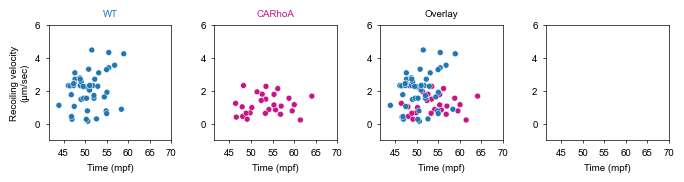

In [29]:
data_subset = data_collection.copy()
# data_subset = data_subset.loc[data_subset['cut_type']=='wt']
data_subset = data_subset.loc[(data_subset['where']=='edge') & (data_subset['orientation']=='perp')]

# plot
fig, axs = plt.subplots(1,4,figsize=[8, 1.5], gridspec_kw={'wspace': 0.35})
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'mpf', y = 'rv', ax=axs[0], legend=False,
                size=0.1, color = 'tab:blue')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'mpf', y = 'rv', ax=axs[1], legend=False,
                size=0.1, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'mpf', y = 'rv', ax=axs[2], legend=False,
                size=0.1, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'mpf', y = 'rv', ax=axs[2], legend=False,
                size=0.1, color = 'tab:blue')

# axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)

axs[0].set_ylabel('Recoiling velocity\n(\u03BCm/sec)')
axs[1].set_ylabel('')
axs[2].set_ylabel('')

axs[0].set_title('WT', fontsize=7, color='tab:blue')
axs[1].set_title('CARhoA', fontsize=7, color='mediumvioletred')
axs[2].set_title('Overlay', fontsize=7)


[ax.set_xlabel('Time (mpf)') for ax in axs]
[ax.set_xlim(41.5, 70) for ax in axs]
[ax.set_xticks(np.arange(45, 71, 5)) for ax in axs]
[ax.set_ylim(-1, 6) for ax in axs]

plt.savefig('wt_carhoa_rv-edge-perp-time.svg')
plt.show()

compare the tension in the band edge, para

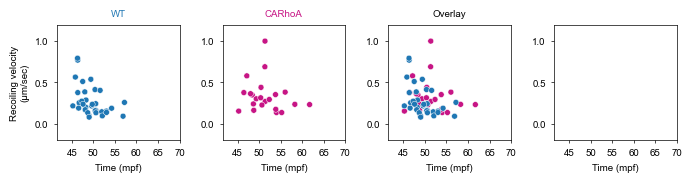

In [30]:
data_subset = data_collection.copy()
# data_subset = data_subset.loc[data_subset['cut_type']=='wt']
data_subset = data_subset.loc[(data_subset['where']=='edge') & (data_subset['orientation']=='para')]

# plot
fig, axs = plt.subplots(1,4,figsize=[8, 1.5], gridspec_kw={'wspace': 0.35})
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'mpf', y = 'rv', ax=axs[0], legend=False,
                size=0.1, color = 'tab:blue')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'mpf', y = 'rv', ax=axs[1], legend=False,
                size=0.1, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'mpf', y = 'rv', ax=axs[2], legend=False,
                size=0.1, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'mpf', y = 'rv', ax=axs[2], legend=False,
                size=0.1, color = 'tab:blue')

# axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=12)

axs[0].set_ylabel('Recoiling velocity\n(\u03BCm/sec)')
axs[1].set_ylabel('')
axs[2].set_ylabel('')

axs[0].set_title('WT', fontsize=7, color='tab:blue')
axs[1].set_title('CARhoA', fontsize=7, color='mediumvioletred')
axs[2].set_title('Overlay', fontsize=7)


[ax.set_xlabel('Time (mpf)') for ax in axs]
[ax.set_xlim(41.5, 70) for ax in axs]
[ax.set_xticks(np.arange(45, 71, 5)) for ax in axs]
[ax.set_ylim(-0.2, 1.2) for ax in axs]

plt.savefig('wt_carhoa_rv-edge-para-time.svg')
plt.show()

compare the tension at the band (both middle and edge) with nematic order

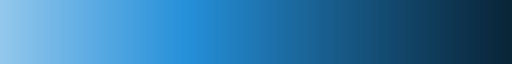

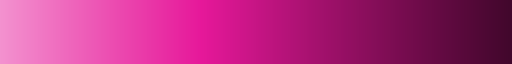

In [31]:
def shaded_cmap(color="tab:blue", shade_range=[.2, .8]):
    import colorsys
    num = 1024
    color_rgb = mpl.colors.to_rgb(color)
    color_hls = colorsys.rgb_to_hls(color_rgb[0], color_rgb[1], color_rgb[2])
    shading = np.linspace(shade_range[0], shade_range[1], num)
    gamma = math.log(0.5) / math.log(color_hls[1])
    shading_conversion = np.exp(np.log(shading)/gamma)
    shaded_cmap = []
    for i in range(num):
        shaded_color = colorsys.hls_to_rgb(color_hls[0], shading_conversion[i], color_hls[2])
        shaded_cmap.append(shaded_color)
    
    # _,ax=plt.subplots(figsize=(3,2))
    # ax.scatter(range(num), shading_conversion, color=shaded_cmap)
    # ax.scatter((num-1)/2, color_hls[1], color=color, s=200)
    # ax.set_ylim(0,1)
    # ax.set_ylabel('Lightness')
    # plt.show()

    shaded_cmap = mpl.colors.ListedColormap(shaded_cmap)
    return shaded_cmap


def colored_line(x,y,c,ax, vmin='auto', vmax='auto', **lc_kwargs):
    
    from matplotlib.collections import LineCollection
    default_kwargs = {"capstyle": "butt"}
    default_kwargs.update(lc_kwargs)

    # c = (c-np.nanmin(c)) / (np.nanmax(c) - np.nanmin(c))
    # c = (c-vmin) / (vmax-vmin)
    # colors = plt.colormaps[cmap](c)

    x = np.asarray(x)
    y = np.asarray(y)
    x_midpts = np.hstack((x[0], 0.5 * (x[1:] + x[:-1]), x[-1]))
    y_midpts = np.hstack((y[0], 0.5 * (y[1:] + y[:-1]), y[-1]))

    coord_start = np.column_stack((x_midpts[:-1], y_midpts[:-1]))[:, np.newaxis, :]
    coord_mid = np.column_stack((x, y))[:, np.newaxis, :]
    coord_end = np.column_stack((x_midpts[1:], y_midpts[1:]))[:, np.newaxis, :]
    segments = np.concatenate((coord_start, coord_mid, coord_end), axis=1)

    if vmin == 'auto':
        vmin = c.min()
    if vmax == 'auto':
        vmax = c.max()

    lc = LineCollection(segments, **default_kwargs)
    if (vmin==0) and (vmax ==1):
        lc.set_array(c)
    else:
        lc.set_array(c)
        lc.set(clim=(vmin, vmax))

    return ax.add_collection(lc)


shaded_tab_blue = shaded_cmap("tab:blue", [0.8, 0.2])
shaded_mediumvioletred = shaded_cmap("mediumvioletred", [0.8, 0.2])

display(shaded_tab_blue)
display(shaded_mediumvioletred)

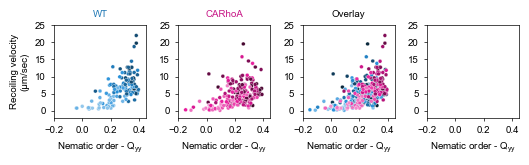

In [32]:
data_subset = data_collection.copy()
data_subset = data_subset.loc[data_subset['where'].isin(['middle'])]
data_subset = data_subset.loc[data_subset['orientation']=='perp']

# plot
fig, axs = plt.subplots(1,4,figsize=[6, 1.2], gridspec_kw={'wspace': 0.35})
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'no_qxx', y = 'rv', ax=axs[0], legend=False, hue='mpf', palette=shaded_tab_blue, hue_norm=(43, 65), s=7.5)
                # size=0.1, color = 'tab:blue')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'no_qxx', y = 'rv', ax=axs[1], legend=False, hue='mpf', palette=shaded_mediumvioletred, hue_norm=(43, 65), s=7.5)
                # size=0.1, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'no_qxx', y = 'rv', ax=axs[2], legend=False, hue='mpf', palette=shaded_tab_blue, hue_norm=(43, 65), s=7.5)
                # size=0.1, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'no_qxx', y = 'rv', ax=axs[2], legend=False, hue='mpf', palette=shaded_mediumvioletred, hue_norm=(43, 65), s=7.5)
                # size=0.1, color = 'tab:blue')

# sns.swarmplot(data = data_subset, x = 'no_qxx', y = 'rv', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
#               size=2, alpha=0.5)
# sns.pointplot(data = data_subset, x = 'no_qxx', y = 'rv', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
#               estimator='mean', errorbar=('ci', 95), lw=1.6, marker='_', markersize=4, markeredgewidth=1,
#               capsize=0.3, err_kws={'linewidth': 1.6})

axs[0].set_ylabel('Recoiling velocity\n(\u03BCm/sec)')
axs[1].set_ylabel('')
axs[2].set_ylabel('')
axs[3].set_ylabel('')

axs[0].set_title('WT', fontsize=7, color='tab:blue')
axs[1].set_title('CARhoA', fontsize=7, color='mediumvioletred')
axs[2].set_title('Overlay', fontsize=7)


[ax.set_xlabel('Nematic order - $\\mathregular{Q_{yy}}$') for ax in axs]
[ax.set_xlim(-0.2, 0.45) for ax in axs]
[ax.set_xticks(np.arange(-0.2, 0.5, 0.2)) for ax in axs]
[ax.set_ylim(-2, 25) for ax in axs]
[ax.set_yticks(np.arange(0, 26, 5)) for ax in axs]

# [ax.set_yscale('log') for ax in axs]
plt.savefig('wt_carhoa_rv-middle-perp-qyy.svg')
plt.show()

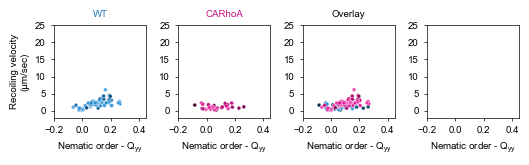

In [33]:
data_subset = data_collection.copy()
data_subset = data_subset.loc[data_subset['where'].isin(['edge'])]
data_subset = data_subset.loc[data_subset['orientation']=='perp']

# plot
fig, axs = plt.subplots(1,4,figsize=[6, 1.2], gridspec_kw={'wspace': 0.35})
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'no_qxx', y = 'rv', ax=axs[0], legend=False, hue='mpf', palette=shaded_tab_blue, hue_norm=(43, 65), s=7.5)
                # size=0.1, color = 'tab:blue')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'no_qxx', y = 'rv', ax=axs[1], legend=False, hue='mpf', palette=shaded_mediumvioletred, hue_norm=(43, 65), s=7.5)
                # size=0.1, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'no_qxx', y = 'rv', ax=axs[2], legend=False, hue='mpf', palette=shaded_tab_blue, hue_norm=(43, 65), s=7.5)
                # size=0.1, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'no_qxx', y = 'rv', ax=axs[2], legend=False, hue='mpf', palette=shaded_mediumvioletred, hue_norm=(43, 65), s=7.5)
                # size=0.1, color = 'tab:blue')

# sns.swarmplot(data = data_subset, x = 'no_qxx', y = 'rv', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
#               size=2, alpha=0.5)
# sns.pointplot(data = data_subset, x = 'no_qxx', y = 'rv', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
#               estimator='mean', errorbar=('ci', 95), lw=1.6, marker='_', markersize=4, markeredgewidth=1,
#               capsize=0.3, err_kws={'linewidth': 1.6})

axs[0].set_ylabel('Recoiling velocity\n(\u03BCm/sec)')
axs[1].set_ylabel('')
axs[2].set_ylabel('')
axs[3].set_ylabel('')

axs[0].set_title('WT', fontsize=7, color='tab:blue')
axs[1].set_title('CARhoA', fontsize=7, color='mediumvioletred')
axs[2].set_title('Overlay', fontsize=7)


[ax.set_xlabel('Nematic order - $\\mathregular{Q_{yy}}$') for ax in axs]
[ax.set_xlim(-0.2, 0.45) for ax in axs]
[ax.set_xticks(np.arange(-0.2, 0.5, 0.2)) for ax in axs]
[ax.set_ylim(-2, 25) for ax in axs]
[ax.set_yticks(np.arange(0, 26, 5)) for ax in axs]

# [ax.set_yscale('log') for ax in axs]
plt.savefig('wt_carhoa_rv-edge-perp-qyy.svg')
plt.show()

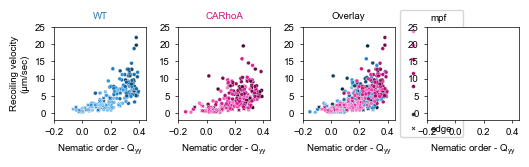

In [176]:
data_subset = data_collection.copy()
data_subset = data_subset.loc[data_subset['where'].isin(['middle', 'edge'])]
data_subset = data_subset.loc[data_subset['orientation']=='perp']

# plot
fig, axs = plt.subplots(1,4,figsize=[6, 1.2], gridspec_kw={'wspace': 0.35})
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'no_qxx', y = 'rv', ax=axs[0], style='where', legend=False, hue='mpf', palette=shaded_tab_blue, hue_norm=(43, 65), s=7.5)
                # size=0.1, color = 'tab:blue')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'no_qxx', y = 'rv', ax=axs[1], style='where', legend=False, hue='mpf', palette=shaded_mediumvioletred, hue_norm=(43, 65), s=7.5)
                # size=0.1, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'no_qxx', y = 'rv', ax=axs[2], style='where', legend=False, hue='mpf', palette=shaded_tab_blue, hue_norm=(43, 65), s=7.5)
                # size=0.1, color = 'mediumvioletred')
sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'no_qxx', y = 'rv', ax=axs[2], style='where', legend=True, hue='mpf', palette=shaded_mediumvioletred, hue_norm=(43, 65), s=7.5)
                # size=0.1, color = 'tab:blue')

# sns.swarmplot(data = data_subset, x = 'no_qxx', y = 'rv', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
#               size=2, alpha=0.5)
# sns.pointplot(data = data_subset, x = 'no_qxx', y = 'rv', ax=axs[3], hue='cut_type', legend=False, palette = ['tab:blue', 'mediumvioletred'],
#               estimator='mean', errorbar=('ci', 95), lw=1.6, marker='_', markersize=4, markeredgewidth=1,
#               capsize=0.3, err_kws={'linewidth': 1.6})

axs[0].set_ylabel('Recoiling velocity\n(\u03BCm/sec)')
axs[1].set_ylabel('')
axs[2].set_ylabel('')
axs[3].set_ylabel('')

axs[0].set_title('WT', fontsize=7, color='tab:blue')
axs[1].set_title('CARhoA', fontsize=7, color='mediumvioletred')
axs[2].set_title('Overlay', fontsize=7)


[ax.set_xlabel('Nematic order - $\\mathregular{Q_{yy}}$') for ax in axs]
[ax.set_xlim(-0.2, 0.45) for ax in axs]
[ax.set_xticks(np.arange(-0.2, 0.5, 0.2)) for ax in axs]
[ax.set_ylim(-2, 25) for ax in axs]
[ax.set_yticks(np.arange(0, 26, 5)) for ax in axs]

axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, fontsize=7)

# [ax.set_yscale('log') for ax in axs]
plt.savefig('wt_carhoa_rv-both-para-qyy.svg')
plt.show()

In [177]:
data_subset['bign'] = data_subset['experiment'] + data_subset['batch'].astype('int').astype('str')
data_subset['smalln'] = data_subset['experiment'] + data_subset['embryo_no'].astype('int').astype('str')
data_subset['catalog'] = data_subset['cut_type'] + data_subset['where']
# data_subset['smalln'] = data_subset['experiment'] + data_subset['batch'].astype('int').astype('str')+ data_subset['embryo_no'].astype('int').astype('str')

print('wtmiddle',
      len(np.unique(data_subset.loc[data_subset['catalog']=='wtmiddle'].experiment)),
      len(np.unique(data_subset.loc[data_subset['catalog']=='wtmiddle'].bign)),
      len(np.unique(data_subset.loc[data_subset['catalog']=='wtmiddle'].smalln)),
      len(data_subset.loc[data_subset['catalog']=='wtmiddle']))
print('wtedge',
      len(np.unique(data_subset.loc[data_subset['catalog']=='wtedge'].experiment)),
      len(np.unique(data_subset.loc[data_subset['catalog']=='wtedge'].bign)),
      len(np.unique(data_subset.loc[data_subset['catalog']=='wtedge'].smalln)),
      len(data_subset.loc[data_subset['catalog']=='wtedge']))
print('carhoamiddle',
      len(np.unique(data_subset.loc[data_subset['catalog']=='carhoamiddle'].experiment)),
      len(np.unique(data_subset.loc[data_subset['catalog']=='carhoamiddle'].bign)),
      len(np.unique(data_subset.loc[data_subset['catalog']=='carhoamiddle'].smalln)),
      len(data_subset.loc[data_subset['catalog']=='carhoamiddle']))
print('carhoaedge',
      len(np.unique(data_subset.loc[data_subset['catalog']=='carhoaedge'].experiment)),
      len(np.unique(data_subset.loc[data_subset['catalog']=='carhoaedge'].bign)),
      len(np.unique(data_subset.loc[data_subset['catalog']=='carhoaedge'].smalln)),
      len(data_subset.loc[data_subset['catalog']=='carhoaedge']))

wtmiddle 5 14 87 134
wtedge 5 12 39 49
carhoamiddle 8 21 110 202
carhoaedge 4 8 24 27


In [90]:
np.unique(data_subset.catalog)

array(['carhoaedge', 'carhoamiddle', 'wtedge', 'wtmiddle'], dtype=object)

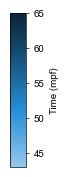

In [37]:
fig, ax = plt.subplots(figsize=(0.2, 2), layout='constrained')
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=43, vmax=65),
                                   cmap=shaded_tab_blue),
                                   cax=ax, orientation='vertical')
ax.set_ylabel('Time (mpf)', fontsize=7)
# ax.set_yticks(np.arange(0,330,50))
plt.savefig('wt_carhoa_rv-both-para-qyy_wt_colorbar.svg')

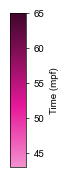

In [39]:
fig, ax = plt.subplots(figsize=(0.2, 2), layout='constrained')
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=43, vmax=65),
                                   cmap=shaded_mediumvioletred),
                                   cax=ax, orientation='vertical')
ax.set_ylabel('Time (mpf)', fontsize=7)
# ax.set_yticks(np.arange(0,330,50))
plt.savefig('wt_carhoa_rv-both-para-qyy_carhoa_colorbar.svg')

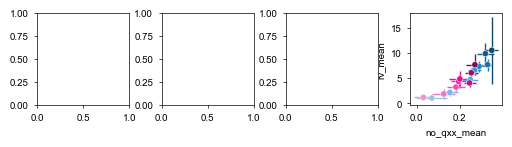

In [46]:
data_subset = data_collection.copy()
data_subset = data_subset.loc[data_subset['where'].isin(['middle'])]
data_subset = data_subset.loc[data_subset['orientation']=='perp']
data_subset = data_subset.loc[data_subset['mpf']<=60]
data_subset['time_bin'] = 2.5 * np.round(data_subset['mpf'] / 2.5).astype('int')

grouped = data_subset.groupby(['time_bin', 'cut_type']).agg(
    rv_mean=('rv', 'mean'),
    rv_ci=('rv', confidence_interval),
    no_qxx_mean=('no_qxx', 'mean'),
    no_qxx_ci=('no_qxx', confidence_interval)
).reset_index()
# display(grouped)


# fig,ax=plt.subplots(figsize=[1.2, 1.2])
# sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'no_qxx', y = 'rv', ax=ax, legend=False, hue='mpf', palette=shaded_tab_blue, hue_norm=(43, 65), s=7.5)
# sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'no_qxx', y = 'rv', ax=ax, legend=False, hue='mpf', palette=shaded_mediumvioletred, hue_norm=(43, 65), s=7.5)
# ax.set_xlim(-0.2, 0.45)
# ax.set_xticks(np.arange(-0.2, 0.5, 0.2))
# ax.set_ylim(-2, 25)
# ax.set_yticks(np.arange(0, 26, 5))
# plt.show()

fig, axs = plt.subplots(1,4,figsize=[6, 1.2], gridspec_kw={'wspace': 0.35})
# sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='carhoa'], x = 'no_qxx', y = 'rv', ax=ax, legend=False, hue='mpf', palette=shaded_tab_blue, hue_norm=(43, 65), s=7.5, alpha=0.5)
# sns.scatterplot(data = data_subset.loc[data_subset['cut_type']=='wt'], x = 'no_qxx', y = 'rv', ax=ax, legend=False, hue='mpf', palette=shaded_mediumvioletred, hue_norm=(43, 65), s=7.5, alpha=0.5)
sns.scatterplot(data=grouped.loc[grouped['cut_type'] == 'wt'], x='no_qxx_mean', y='rv_mean', hue='time_bin', ax=axs[3], legend=False, zorder=5, palette=shaded_tab_blue, hue_norm=(43, 65), s=20)
sns.scatterplot(data=grouped.loc[grouped['cut_type'] == 'carhoa'], x='no_qxx_mean', y='rv_mean', hue='time_bin', ax=axs[3], legend=False, zorder=5, palette=shaded_mediumvioletred, hue_norm=(43, 65), s=20)


for cut_type, group in grouped.groupby("cut_type"):
    if cut_type == 'wt':
        plot_cmap=shaded_tab_blue
    elif cut_type == 'carhoa':
        plot_cmap=shaded_mediumvioletred

    for i in group.index:
        axs[3].errorbar(
            group.loc[i, "no_qxx_mean"], group.loc[i, "rv_mean"],
            xerr=group.loc[i, "no_qxx_ci"], yerr=group.loc[i, "rv_ci"], fmt='none', 
            capsize=0, elinewidth=1, color=plot_cmap((group.loc[i, "time_bin"]-43)/(65-43)), zorder=1,
        )
# ax.set_xlim(-0.2, 0.45)
# ax.set_xticks(np.arange(-0.2, 0.5, 0.2))
# ax.set_ylim(-2, 25)
# ax.set_yticks(np.arange(0, 26, 5))
plt.savefig('wt_carhoa_rv-middle-para-qyy_errbar.svg')
plt.show()